# Import the libraries required to perform Linear regression

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
sales =  pd.read_csv('/content/drive/My Drive/PGP-AIML/M2 : Machine Learning/Week1/Sales.csv')
data = sales.copy()

In [ ]:
data.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Advertising Expenditure        3000 non-null   float64
 1   Campaign Engagement Score      3000 non-null   float64
 2   Discount Percentage            3000 non-null   float64
 3   Average Customer Rating        3000 non-null   float64
 4   Product Price                  3000 non-null   float64
 5   Return Rate                    3000 non-null   float64
 6   Length of Product Description  3000 non-null   float64
 7   Region                         3000 non-null   object 
 8   Popularity                     3000 non-null   object 
 9   Sales                          3000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


In [ ]:
data.isnull().sum()

,0
Advertising Expenditure,0
Campaign Engagement Score,0
Discount Percentage,0
Average Customer Rating,0
Product Price,0
Return Rate,0
Length of Product Description,0
Region,0
Popularity,0
Sales,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Advertising Expenditure,3000.0,607.727150,82.025112,97.250000,561.984787,616.116596,666.331853,801.500000
Campaign Engagement Score,3000.0,49.456305,13.171290,0.000000,40.697530,49.478699,58.150891,98.750000
Discount Percentage,3000.0,28.997927,4.700923,0.000000,26.222998,29.552853,32.259294,40.540000
Average Customer Rating,3000.0,4.408783,0.227823,3.649450,4.251118,4.432254,4.583205,4.874450
Product Price,3000.0,1434.718134,222.832467,9.780000,1306.155958,1461.301831,1587.671790,2000.560000
Return Rate,3000.0,1.666106,0.900435,0.033720,0.954551,1.537856,2.285394,4.534866
Length of Product Description,3000.0,248.696636,60.800024,42.000000,207.076217,249.348398,288.875650,496.000000
Sales,3000.0,23858.638609,3611.748810,3257.595426,21632.968838,24087.129995,26421.772433,34421.427430


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop_duplicates()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148
...,...,...,...,...,...,...,...,...,...,...
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,North,Moderate,21332.40603
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,West,High,26780.91894
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,South,Moderate,21217.38795
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,West,High,22094.55742


# Univarate Analysis


In [ ]:
numeric_features = data.select_dtypes(include='number').columns.to_list()

numeric_features

['Advertising Expenditure',
 'Campaign Engagement Score',
 'Discount Percentage',
 'Average Customer Rating',
 'Product Price',
 'Return Rate',
 'Length of Product Description',
 'Sales']

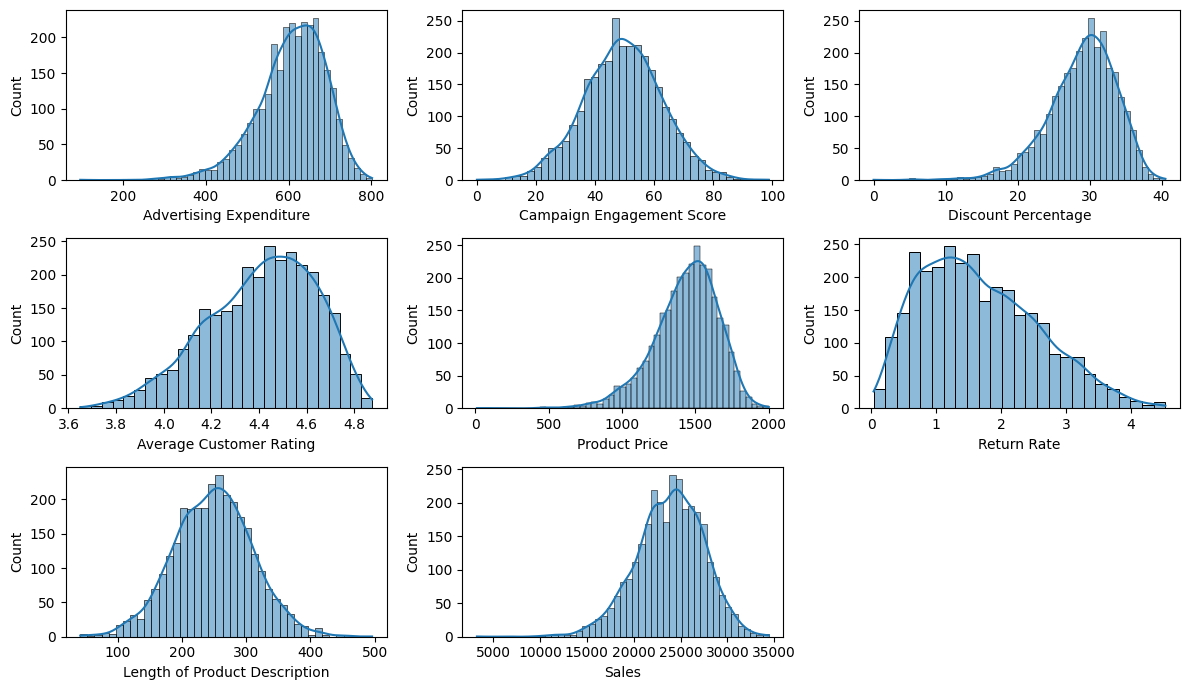

In [ ]:
plt.figure(figsize=(12,7))
for i, feature in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.histplot(data=data, x=feature, kde=True)


plt.tight_layout()
plt.show()



* Advertising expenditure, Discount Percentage, Sales,avg. customer rating, product pricing, and sales are left skewed
* Campaign engagement score, Length of Product Description have normal distribution
* Return rate is right skewed.

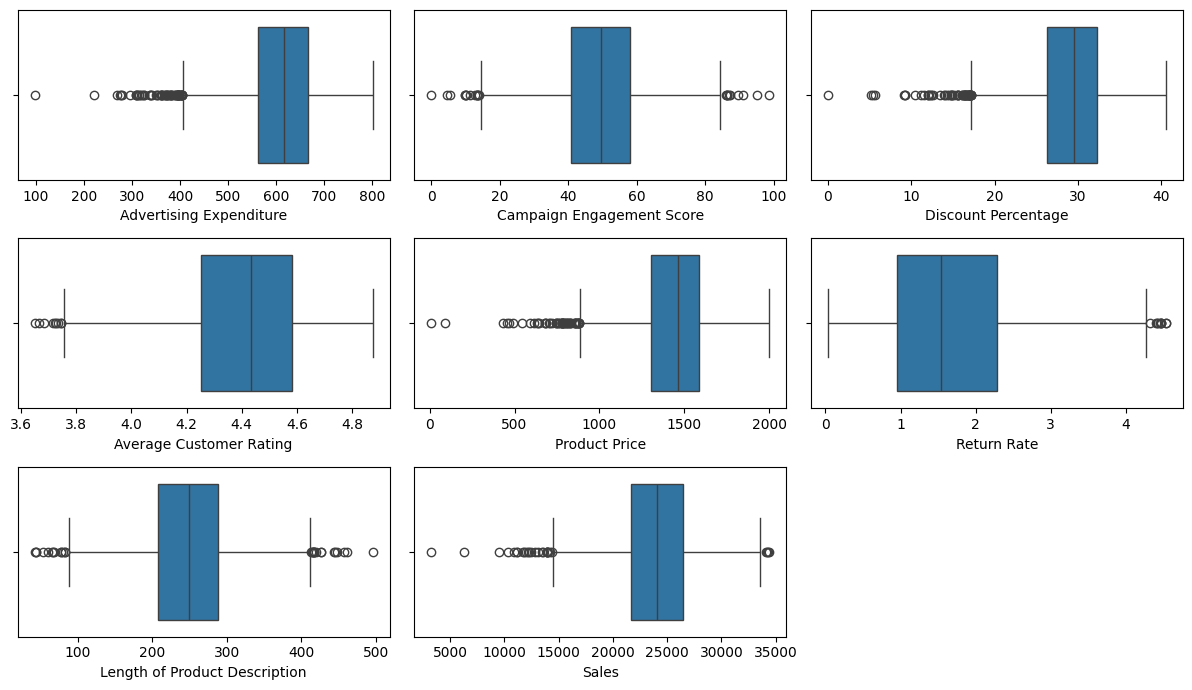

In [ ]:
# Check box plots

plt.figure(figsize=(12,7))
for i, feature in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=data, x=feature)

plt.tight_layout()
plt.show()


* almost all the features have outliers

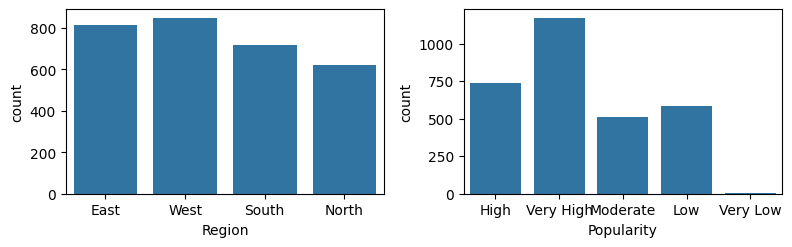

In [ ]:
# Count plot of the categorical vairables

categorical_features = data.select_dtypes(exclude='number').columns.to_list()

plt.figure(figsize=(12,7))

for i, feature in enumerate(categorical_features):
  plt.subplot(3,3,i+1)
  sns.countplot(data=data, x=feature)

plt.tight_layout()
plt.show()

* Highest sales are in West region.
* Very High popular products have high slaes.
* Sales of Very Low popular products is negligible

##Bivariate analysis

<Figure size 1200x700 with 0 Axes>

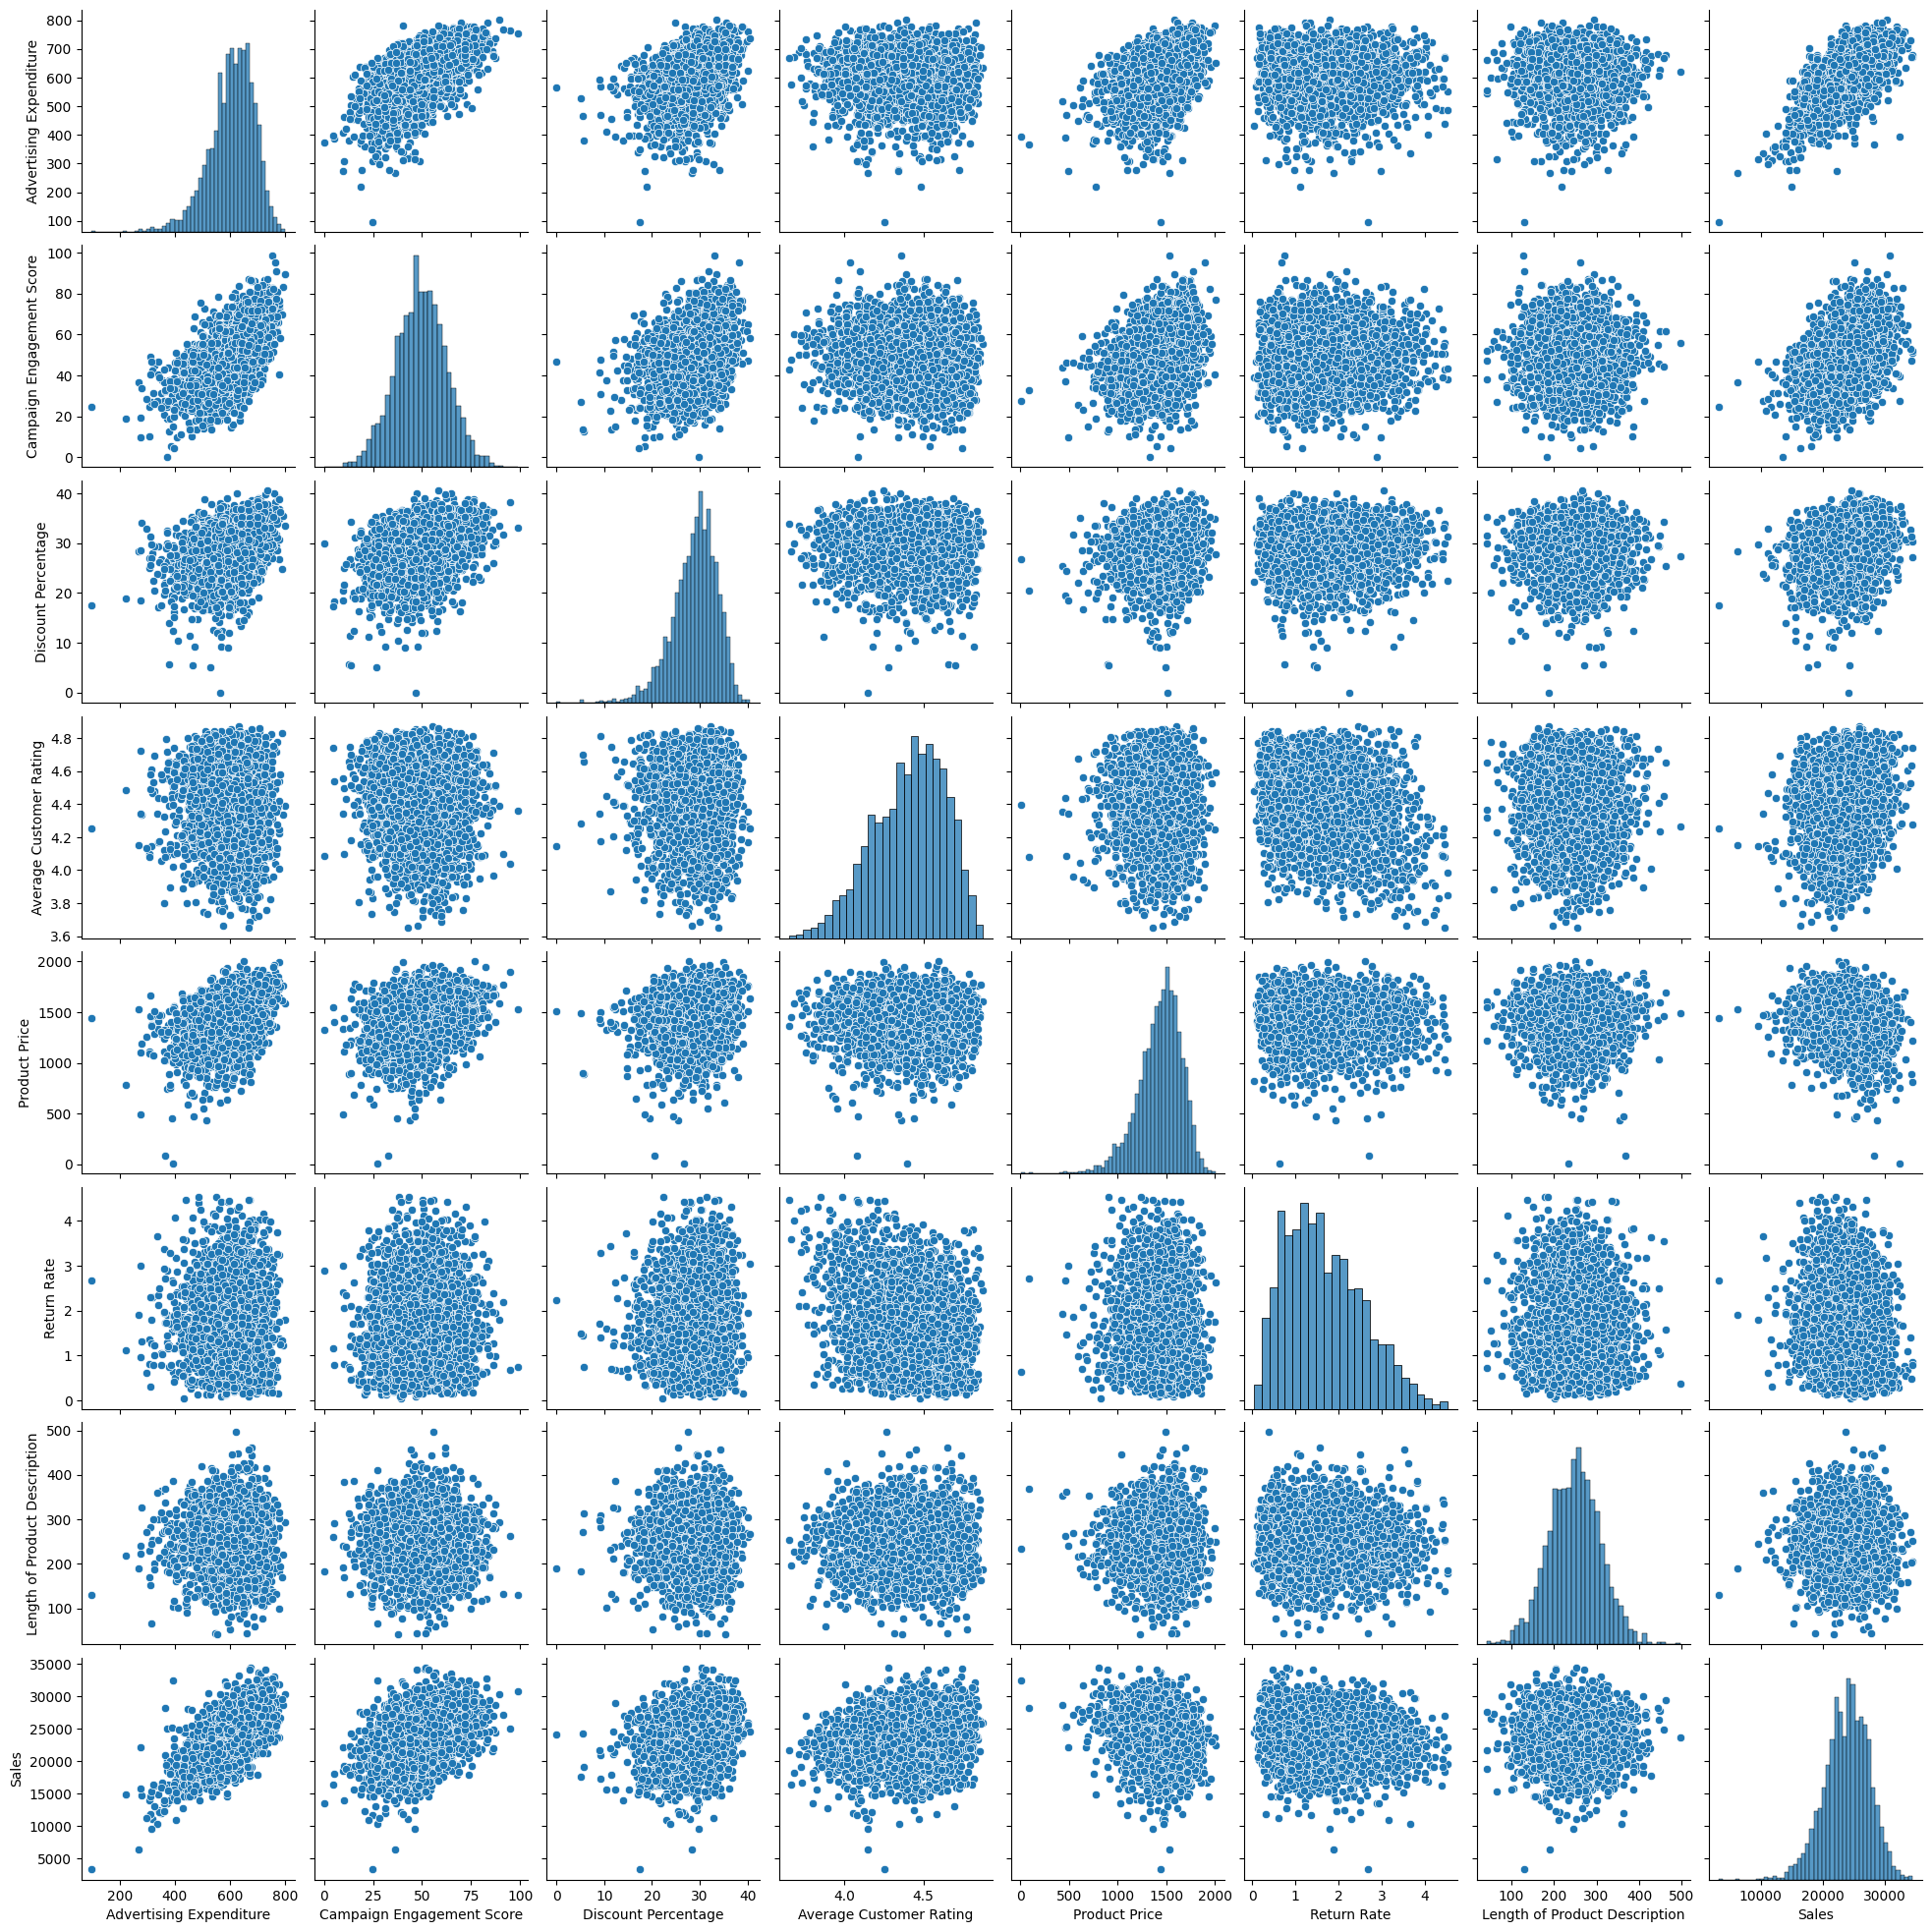

In [ ]:
plt.figure(figsize=(12,7))

sns.pairplot(data=data)
plt.show()




* Sales seems to be positively correlated with Advertizing Expenditure, Campaign Engagement Score, Average custome rating
* Sales seems to be negatively correlated with Price.

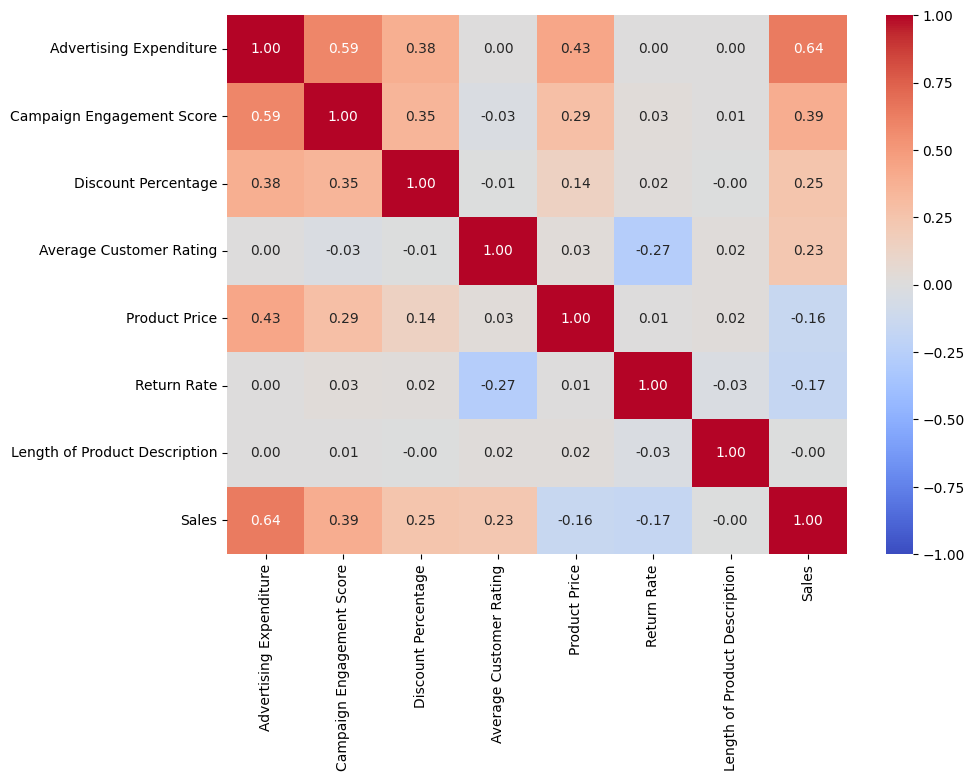

In [ ]:
# Lets check the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data=data.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='0.2f')
plt.show()



* Sales has a positive correlation with Advertising Expenditure, Campaign Engagement Score, Discount Percentage, Averatge Customer Rating.
* Sales has a negative correlation with Product Price and Return rate but corrrelation is low.
* Advertising Expenditure and Campaign Engagement Score have positive corelation.
* Return rate and Average Customer Rating are negatively correlated.

<Axes: xlabel='Popularity', ylabel='Sales'>

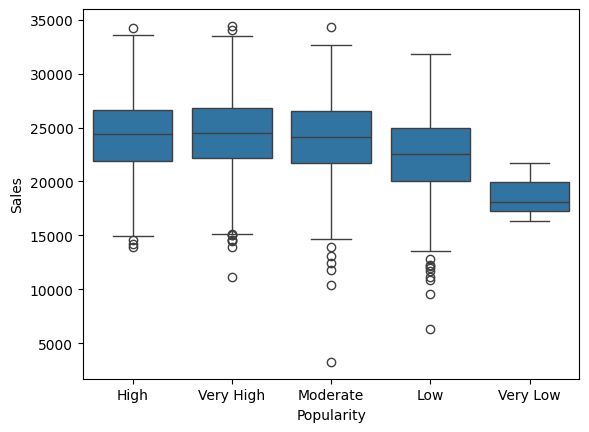

In [ ]:
sns.boxplot(data=data, x='Popularity', y='Sales')

* Lower sales for unpopular products
* Other than Verlo Low popular product sales, rest all have some outliers

<Axes: xlabel='Region', ylabel='Sales'>

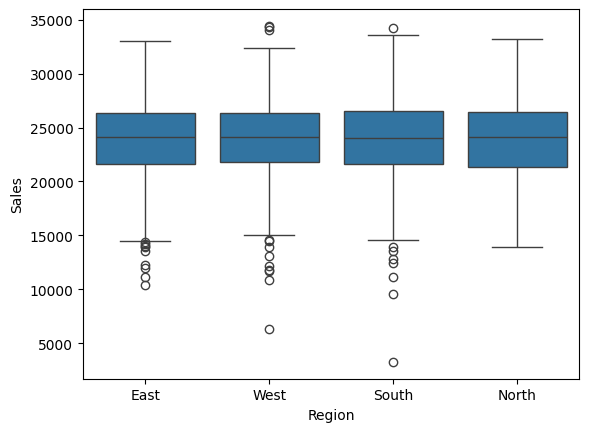

In [ ]:
sns.boxplot(data=data, x='Region', y='Sales')

* Sales across all regions are very similar
* Except North, all other regions have some outliers

<Axes: xlabel='Advertising Expenditure', ylabel='Sales'>

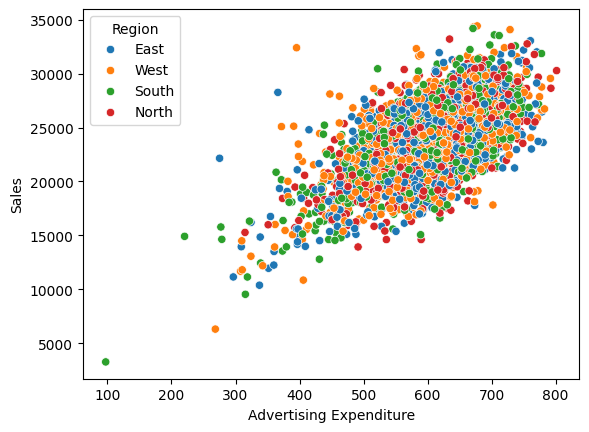

In [ ]:
# Sales vs Advertizing Expenditure

sns.scatterplot(data=data, x='Advertising Expenditure', y='Sales', hue='Region')

# Data preperation for modeling

In [ ]:
X = data.drop('Sales', axis=1)
y = data['Sales']

## Split the data into training and test data sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [ ]:
ind_var1 = ['Advertising Expenditure']

linear_reg1 = LinearRegression()
linear_reg1.fit(X_train[ind_var1], y_train )




LinearRegression()

In [ ]:
print("Slope:", linear_reg1.coef_, "Intercept:", linear_reg1.intercept_)

Slope: [28.66748755] Intercept: 6435.891302271037


In [ ]:
print("Sales = ", linear_reg1.intercept_ , " + ", linear_reg1.coef_, "* (Advertising Expenditure)")

Sales =  6435.891302271037  +  [28.66748755] * (Advertising Expenditure)


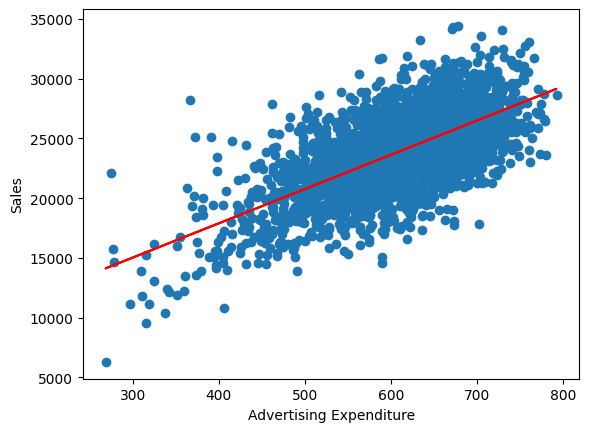

In [ ]:
# Plotting the best fit line

fitted_values1 = linear_reg1.predict(X_train[ind_var1])

plt.scatter(x=X_train[ind_var1], y=y_train)
plt.plot(X_train[ind_var1[0]], fitted_values1, color='red')
plt.xlabel("Advertising Expenditure")
plt.ylabel("Sales")
plt.show()

In [ ]:
ind_vars2 = ['Campaign Engagement Score']

linear_reg2 = LinearRegression()
linear_reg2.fit(X_train[ind_vars2], y_train)

LinearRegression()

In [ ]:
print("Sales = ", linear_reg2.intercept_ , " + ", linear_reg2.coef_ , " * (Campaign Engagement Score)")

Sales =  18483.47815391551  +  [108.57019745]  * (Campaign Engagement Score)


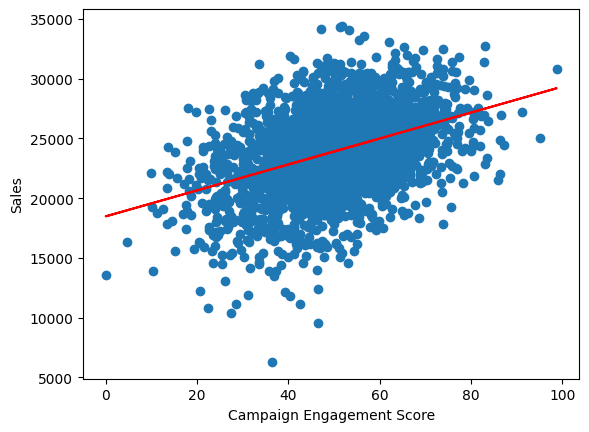

In [ ]:
# Draw the best fit line

fitted_values2 = linear_reg2.predict(X_train[ind_vars2])

plt.scatter(X_train[ind_vars2], y_train)
plt.plot(X_train[ind_vars2], fitted_values2, color='red')
plt.xlabel(ind_vars2[0])
plt.ylabel('Sales')
plt.show()

In [ ]:
# Sales vs Discount Percentage
ind_vars3 = ['Discount Percentage']

linear_reg3 = LinearRegression()
linear_reg3.fit(X_train[ind_vars3], y_train)



LinearRegression()

In [ ]:
print(' Sales = ', linear_reg3.intercept_, " + ", linear_reg3.coef_, " * (Discount Percentage)")

 Sales =  18411.681879531294  +  [188.3855554]  * (Discount Percentage)


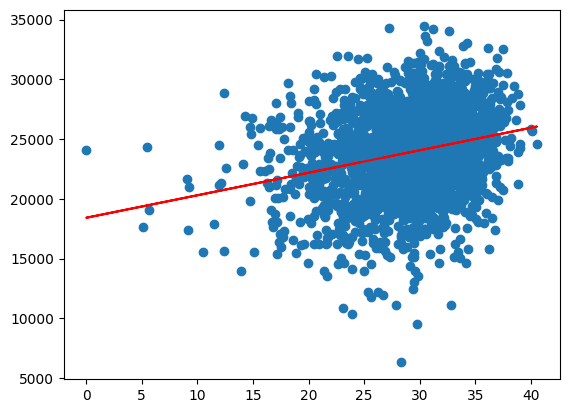

In [ ]:
# best fit line.

fitted_values3 = linear_reg3.predict(X_train[ind_vars3])

plt.scatter(X_train[ind_vars3], y_train)
plt.plot(X_train[ind_vars3], fitted_values3, color='red')
plt.show()

In [ ]:
# Sales vs Product pricing

ind_vars4 = ['Product Price']

linear_reg4 = LinearRegression()
linear_reg4.fit(X_train[ind_vars4], y_train)


LinearRegression()

In [ ]:
print(f"Sales = {linear_reg4.intercept_} + {linear_reg4.coef_[0]} * (Product Price)")

Sales = 27522.91607345547 + -2.539232052840615 * (Product Price)


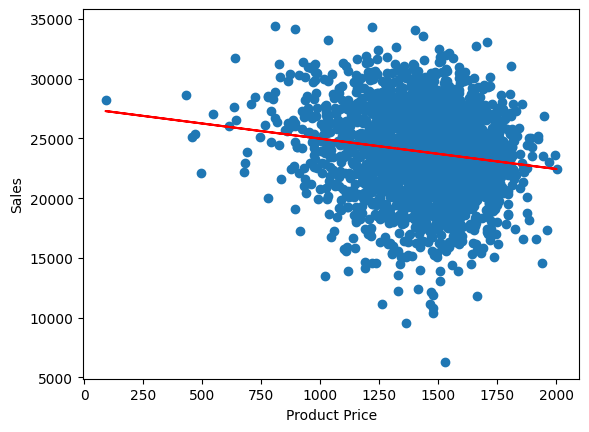

In [ ]:
# Fitted Plot

fitted_values4 = linear_reg4.predict(X_train[ind_vars4])

plt.scatter(X_train[ind_vars4], y_train)
plt.plot(X_train[ind_vars4], fitted_values4, color='red')
plt.xlabel(ind_vars4[0])
plt.ylabel('Sales')
plt.show()

#Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`

In [ ]:
ind_vars5 = ['Advertising Expenditure', 'Discount Percentage']

linear_reg5 = LinearRegression()
linear_reg5.fit(X_train[ind_vars5], y_train)

LinearRegression()

In [ ]:
print(f"Sales = {linear_reg5.intercept_} + {linear_reg5.coef_[0]} * {ind_vars5[0]} + {linear_reg5.coef_[1]} * {ind_vars5[1]}")

Sales = 6463.321146716942 + 28.708432074450347 * Advertising Expenditure + -1.8036346364589904 * Discount Percentage


# Multiple Linear Regression - Advertising Expenditure, Discount Percentage, and 'Product Price'

In [ ]:
ind_vars6 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price']

linear_reg6 = LinearRegression()
linear_reg6.fit(X_train[ind_vars6], y_train)


LinearRegression()

In [ ]:
print(f"Sales = {linear_reg6.coef_[0]} * {ind_vars6[0]} \
        + {linear_reg6.coef_[1]} * {ind_vars6[1]} \
        + {linear_reg6.coef_[2]} * {ind_vars6[2]} \
        + {linear_reg6.intercept_}")

Sales = 38.43656519116551 * Advertising Expenditure         + -3.5748393468180044 * Discount Percentage         + -8.455995295705076 * Product Price         + 12731.131575406755


# Multi-Linear Regression - with numerical and a categorical variable - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity

In [ ]:
X['Popularity'].unique()

array(['High', 'Very High', 'Moderate', 'Low', 'Very Low'], dtype=object)

In [ ]:
label_enc = { 'Very Low': 1,
             'Low' : 2,
             'Moderate': 3,
             'High' : 4,
             'Very High': 5}

X['Popularity'] = X['Popularity'].map(lambda x: label_enc[x])
X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,4
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,5
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,5
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,5
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,3


In [ ]:
# Split the data into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ind_vars7 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price', 'Popularity']

linear_reg7 = LinearRegression()
linear_reg7.fit(X_train[ind_vars7], y_train)



LinearRegression()

In [ ]:
equation = "Sales = " + str(linear_reg7.intercept_) + " + (" + str(linear_reg7.coef_[0]) + ") *" + str(ind_vars7[0])

for i, var in enumerate(ind_vars7):
  equation += "\n + (" + str(linear_reg7.coef_[i]) + ")*" + str(ind_vars7[i])

print(equation)

Sales = 10758.596248519574 + (38.295683415534135) *Advertising Expenditure
 + (38.295683415534135)*Advertising Expenditure
 + (-1.5877980394796403)*Discount Percentage
 + (-8.515977612063976)*Product Price
 + (542.6978481319416)*Popularity


# Multiple Linear Regression with all features

In [ ]:
# Hot encoding of categorical feature 'Region'

X = pd.get_dummies(X,  columns=X.select_dtypes(include=['object', 'category']).columns.to_list(), drop_first=True)
X = X.astype(float)
X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Popularity,Region_North,Region_South,Region_West
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,4.0,0.0,0.0,0.0
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,5.0,0.0,0.0,1.0
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,5.0,0.0,1.0,0.0
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,5.0,0.0,1.0,0.0
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,3.0,0.0,0.0,0.0


In [ ]:
# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_reg8 = LinearRegression()
linear_reg8.fit(X_train, y_train)

LinearRegression()

In [ ]:

equation = "Sales = " + str(linear_reg8.intercept_) + "  (" + str(linear_reg8.coef_[0]) + ")*(" + X_train.columns.tolist()[0] + ")"

for i in range(1, X_train.shape[1]):
  equation +=  "\n  + (" + str(linear_reg8.coef_[i]) + ")*(" + X_train.columns.tolist()[i] + ")"

print(equation)

Sales = 469.5990299012665  (36.80037684442129)*(Advertising Expenditure)
  + (20.777633698251684)*(Campaign Engagement Score)
  + (-6.918466291297645)*(Discount Percentage)
  + (2890.27810151582)*(Average Customer Rating)
  + (-8.670033784471654)*(Product Price)
  + (-444.7877341802202)*(Return Rate)
  + (-0.05088338568230606)*(Length of Product Description)
  + (146.84228310853374)*(Popularity)
  + (-6.981144476912429)*(Region_North)
  + (52.88176184795629)*(Region_South)
  + (189.16736137256444)*(Region_West)


# Model performance evaluaton

In [ ]:
# Function to compute Mean Absolute Percent Error (MAPE) score
def mape_score(targets, predictions):
  return np.mean(np.abs(targets-predictions)/targets)*100

#Function to compute the Adjusted R-square
def adjusted_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]

  return 1 - ((1-r2)*(n-1)/(n-k-1))



In [ ]:
# Function to determine Model performance

def compute_model_performance(model, predictors,  target):
  """
  Function to compute the different metrics to evaluate model performance

  model: regression model
  predictors: independent features
  target: actual values.
  """
  predictions = model.predict(predictors)

  rmse = np.sqrt(mean_squared_error(target, predictions))
  mae = mean_absolute_error(target, predictions)
  mape = mape_score(target, predictions)
  r2 = r2_score(target, predictions)
  adjusted_r2 = adjusted_r2_score(predictors, target, predictions)

  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE": mae,
          "MAPE": mape,
          "R2_Score": r2,
          "Adjusted_R2_Score": adjusted_r2,
      },
      index=[0],
  )

  return df_perf


In [ ]:
linear_reg1_train_perf = compute_model_performance(linear_reg1, X_train[ind_var1], y_train)
linear_reg1_train_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2753.419094,2207.551603,9.647262,0.415783,0.415539


## Observation:
* Root mean square error is 2753.
* R2_score is 0.41, which means the model is able to explain the 41% variability of Sales with AdjusAdvertising Expenditure

In [ ]:
linear_reg1_test_perf = compute_model_performance(linear_reg1, X_test[ind_var1], y_test)
linear_reg1_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2857.307226,2226.476254,9.96158,0.385518,0.38449


* RMSE increased compared to training data set, which is not normal
* 38% Sales vairability can be explained by Advertising Expenditure. Its slightly lower than training data set, again its normal

In [ ]:
linear_reg2_train_perf = compute_model_performance(linear_reg2, X_train[ind_vars2], y_train)
print(ind_vars2)
linear_reg2_train_perf

['Campaign Engagement Score']


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,3304.257659,2625.259659,11.785796,0.158648,0.158297


* Model did poorly with Campaign Engagement Score

In [ ]:
linear_reg2_test_perf = compute_model_performance(linear_reg2, X_test[ind_vars2], y_test)
linear_reg2_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,3387.520834,2662.5171,12.596687,0.136307,0.134862


In [ ]:
linear_reg3_train_perf = compute_model_performance(linear_reg3, X_train[ind_vars3], y_train)
print(ind_vars3)
linear_reg3_train_perf

['Discount Percentage']


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,3489.766337,2761.85512,12.464781,0.061525,0.061134


* Model did poorly in predicting sales with discount percentage only

In [ ]:
linear_reg3_test_perf = compute_model_performance(linear_reg3, X_test[ind_vars3], y_test)
linear_reg3_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,3524.541373,2797.50262,13.334384,0.065023,0.06346


In [ ]:
linear_reg4_train_perf = compute_model_performance(linear_reg4, X_train[ind_vars4], y_train)
print(ind_vars4)
linear_reg4_train_perf

['Product Price']


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,3558.436048,2816.479842,12.759044,0.024228,0.023821


* Well, it appears the variation of sales with price is not that significant.

In [ ]:
linear_reg4_test_perf = compute_model_performance(linear_reg4, X_test[ind_vars4], y_test)
linear_reg4_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,3601.594159,2843.696093,13.700047,0.023696,0.022063


In [ ]:
linear_reg5_train_perf = compute_model_performance(linear_reg5, X_train[ind_vars5], y_train)
print(ind_vars5)
linear_reg5_train_perf

['Advertising Expenditure', 'Discount Percentage']


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2753.407802,2207.640909,9.64753,0.415787,0.4153


* Sales variability can be explainable by 41%, inclusion of Discount percentage didn't increase R2_score much implying the discount may not be affecting sales much.

In [ ]:
linear_reg5_test_perf = compute_model_performance(linear_reg5, X_test[ind_vars5], y_test)
linear_reg5_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2857.608291,2226.948004,9.96336,0.385388,0.383329


In [ ]:
linear_reg6_train_perf = compute_model_performance(linear_reg6, X_train[ind_vars6], y_train )
print(ind_vars6)
linear_reg6_train_perf

['Advertising Expenditure', 'Discount Percentage', 'Product Price']


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2170.436447,1757.487072,7.641589,0.636985,0.636531


* 63% variability in sales can be explained by 'Advertising Expenditure', 'Discount Percentage', 'Product Price'

In [ ]:
linear_reg6_test_perf = compute_model_performance(linear_reg6, X_test[ind_vars6], y_test)
linear_reg6_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2179.437285,1740.589014,7.657319,0.642493,0.640694


In [ ]:
linear_reg7_train_perf = compute_model_performance(linear_reg7, X_train[ind_vars7], y_train)
print(ind_vars7)
linear_reg7_train_perf

['Advertising Expenditure', 'Discount Percentage', 'Product Price', 'Popularity']


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2079.919471,1680.33272,7.286114,0.666633,0.666076


In [ ]:
linear_reg7_test_perf = compute_model_performance(linear_reg7, X_test[ind_vars7], y_test)
linear_reg7_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,2047.484172,1639.883732,7.15333,0.684473,0.682352


In [ ]:
linear_reg8_train_perf = compute_model_performance(linear_reg8, X_train, y_train)
linear_reg8_train_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,1940.930335,1564.829605,6.785088,0.709698,0.708361


In [ ]:
linear_reg8_test_perf = compute_model_performance(linear_reg8, X_test, y_test)
linear_reg8_test_perf

,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
0,1907.839718,1558.392467,6.763019,0.726045,0.72092


* Model performed better with all features included, 72% of the sales variability can be explained.

# Model performance comparision

In [ ]:
models_train_comp_df = pd.concat(
      [
          linear_reg1_train_perf.T,
          linear_reg2_train_perf.T,
          linear_reg3_train_perf.T,
          linear_reg4_train_perf.T,
          linear_reg5_train_perf.T,
          linear_reg6_train_perf.T,
          linear_reg7_train_perf.T,
          linear_reg8_train_perf.T], axis=1
)


# defining the list of models built
models_train_comp_df.columns = [
        "Simple Linear Regression - Sales vs Advertising Expenditure",
        "Simple Linear Regression - Sales vs Campaign Engagement Score",
        "Simple Linear Regression - Sales vs Discount Percentage",
        "Simple Linear Regression - Sales vs Product Price",
        "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
        "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
        "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
        "Multiple Linear Regression - Sales vs All independent variables",
        ]

print("Training performance comparison:")
models_train_comp_df.T


Training performance comparison:


,RMSE,MAE,MAPE,R2_Score,Adjusted_R2_Score
Simple Linear Regression - Sales vs Advertising Expenditure,2753.419094,2207.551603,9.647262,0.415783,0.415539
Simple Linear Regression - Sales vs Campaign Engagement Score,3304.257659,2625.259659,11.785796,0.158648,0.158297
Simple Linear Regression - Sales vs Discount Percentage,3489.766337,2761.855120,12.464781,0.061525,0.061134
Simple Linear Regression - Sales vs Product Price,3558.436048,2816.479842,12.759044,0.024228,0.023821
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2753.407802,2207.640909,9.647530,0.415787,0.415300
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2170.436447,1757.487072,7.641589,0.636985,0.636531
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2079.919471,1680.332720,7.286114,0.666633,0.666076
Multiple Linear Regression - Sales vs All independent variables,1940.930335,1564.829605,6.785088,0.709698,0.708361
